# Breast Cancer Detection

## Tools Preparation

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [22]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Exploring Data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Cleaning & Organizing DataSet

In [24]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)
df = df.rename(columns={'diagnosis': 'target'})
df = df.dropna(axis=0)
df['target'] = df['target'].map({'M': 1, 'B': 0})

In [25]:
df.sample(5)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
116,0,8.95,15.76,58.74,245.2,0.09462,0.1243,0.09263,0.02308,0.1305,...,9.414,17.07,63.34,270.0,0.11790,0.1879,0.1544,0.03846,0.1652,0.07722
230,1,17.05,19.08,113.40,895.0,0.11410,0.1572,0.19100,0.10900,0.2131,...,19.590,24.89,133.50,1189.0,0.17030,0.3934,0.5018,0.25430,0.3109,0.09061
284,0,12.89,15.70,84.08,516.6,0.07818,0.0958,0.11150,0.03390,0.1432,...,13.900,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127
211,0,11.84,18.94,75.51,428.0,0.08871,0.0690,0.02669,0.01393,0.1533,...,13.300,24.99,85.22,546.3,0.12800,0.1880,0.1471,0.06913,0.2535,0.07993
180,1,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.28710,0.18780,0.1800,...,33.120,32.85,220.80,3216.0,0.14720,0.4034,0.5340,0.26880,0.2856,0.08082


In [26]:
df.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Save cleaned up Data

In [27]:
df.to_csv('clean_data.csv', index=False, encoding='utf-8')

## Visualizing Data

### Target Distribution

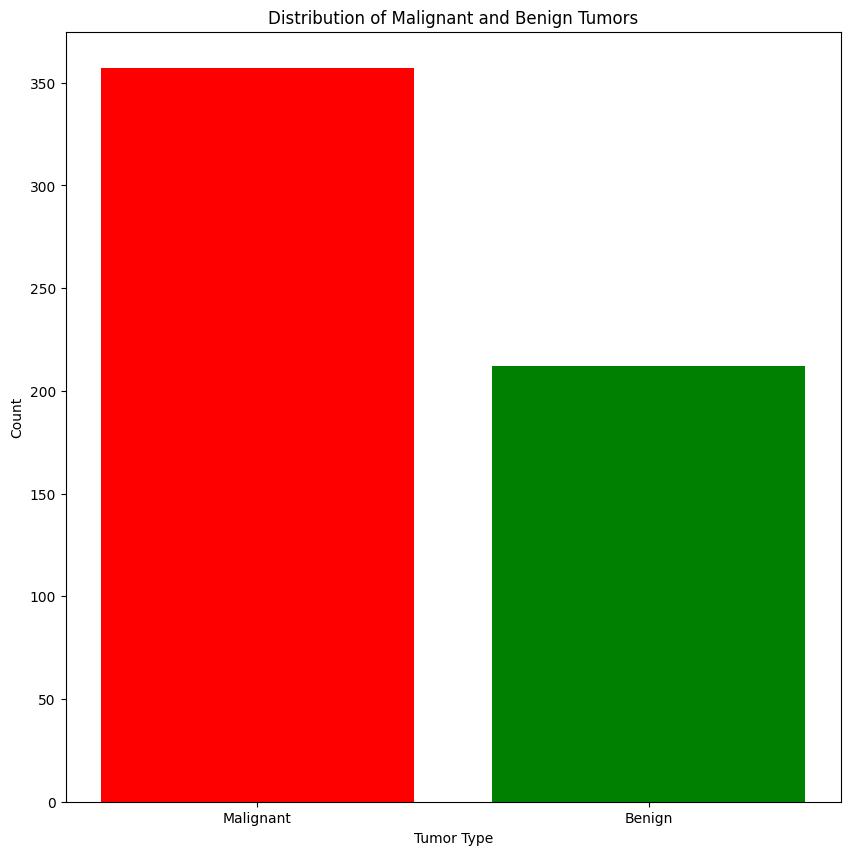

In [28]:
plt.figure(figsize=(10, 10))
plt.bar(['Malignant', 'Benign'], df['target'].value_counts(), color=['red', 'green'])
plt.title('Distribution of Malignant and Benign Tumors')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.show()

### Correlation with Target

<Axes: title={'center': 'Correlation with Diagnosis'}>

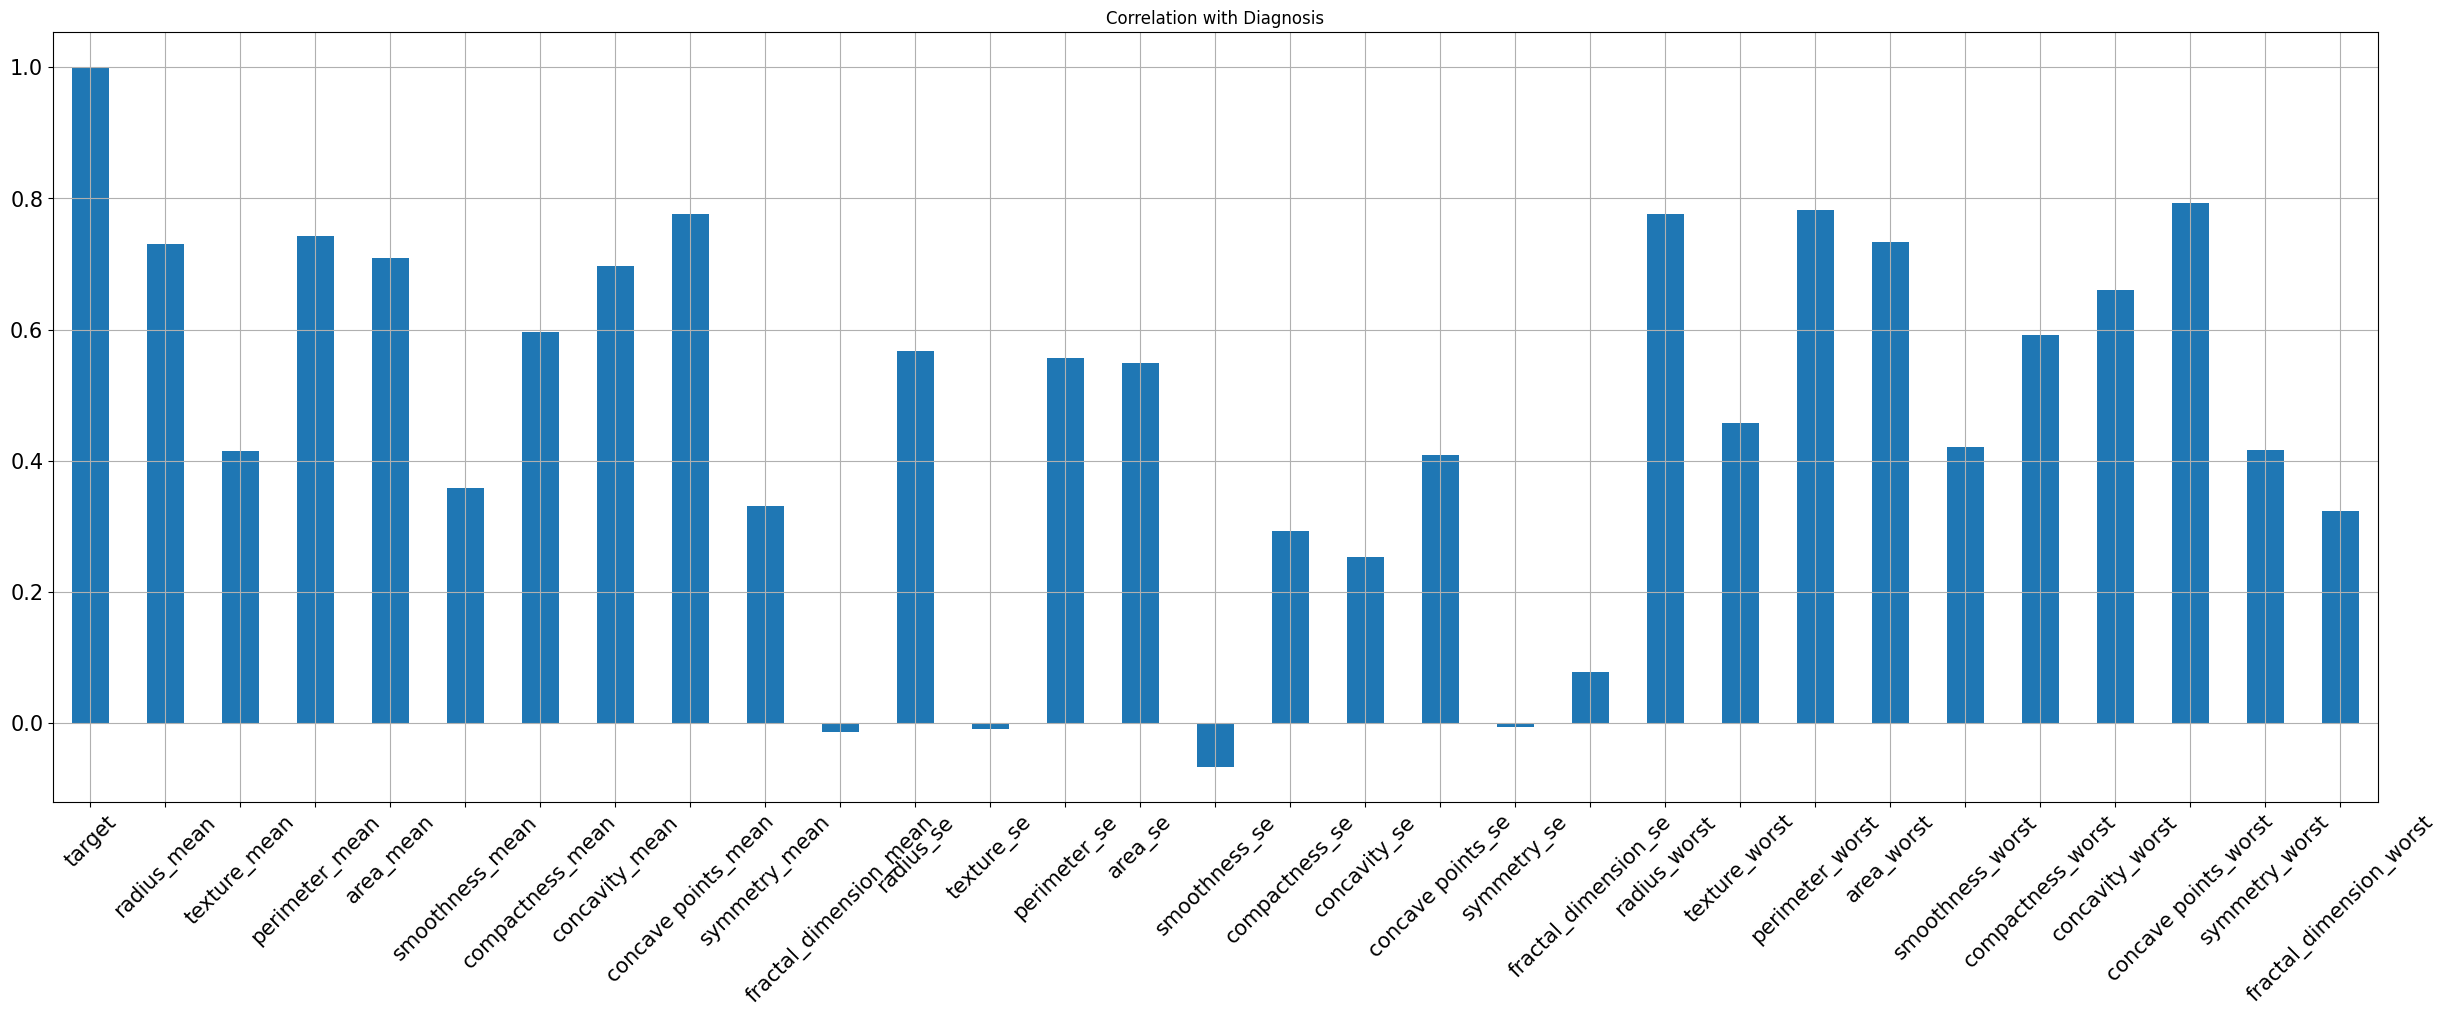

In [29]:
# Correlation with target
from matplotlib.pylab import f


df.corrwith(df['target']).plot.bar(
    figsize=(30, 10),
    title="Correlation with Diagnosis",
    fontsize=15,
    rot=45,
    grid=True
)

### Features Correlation

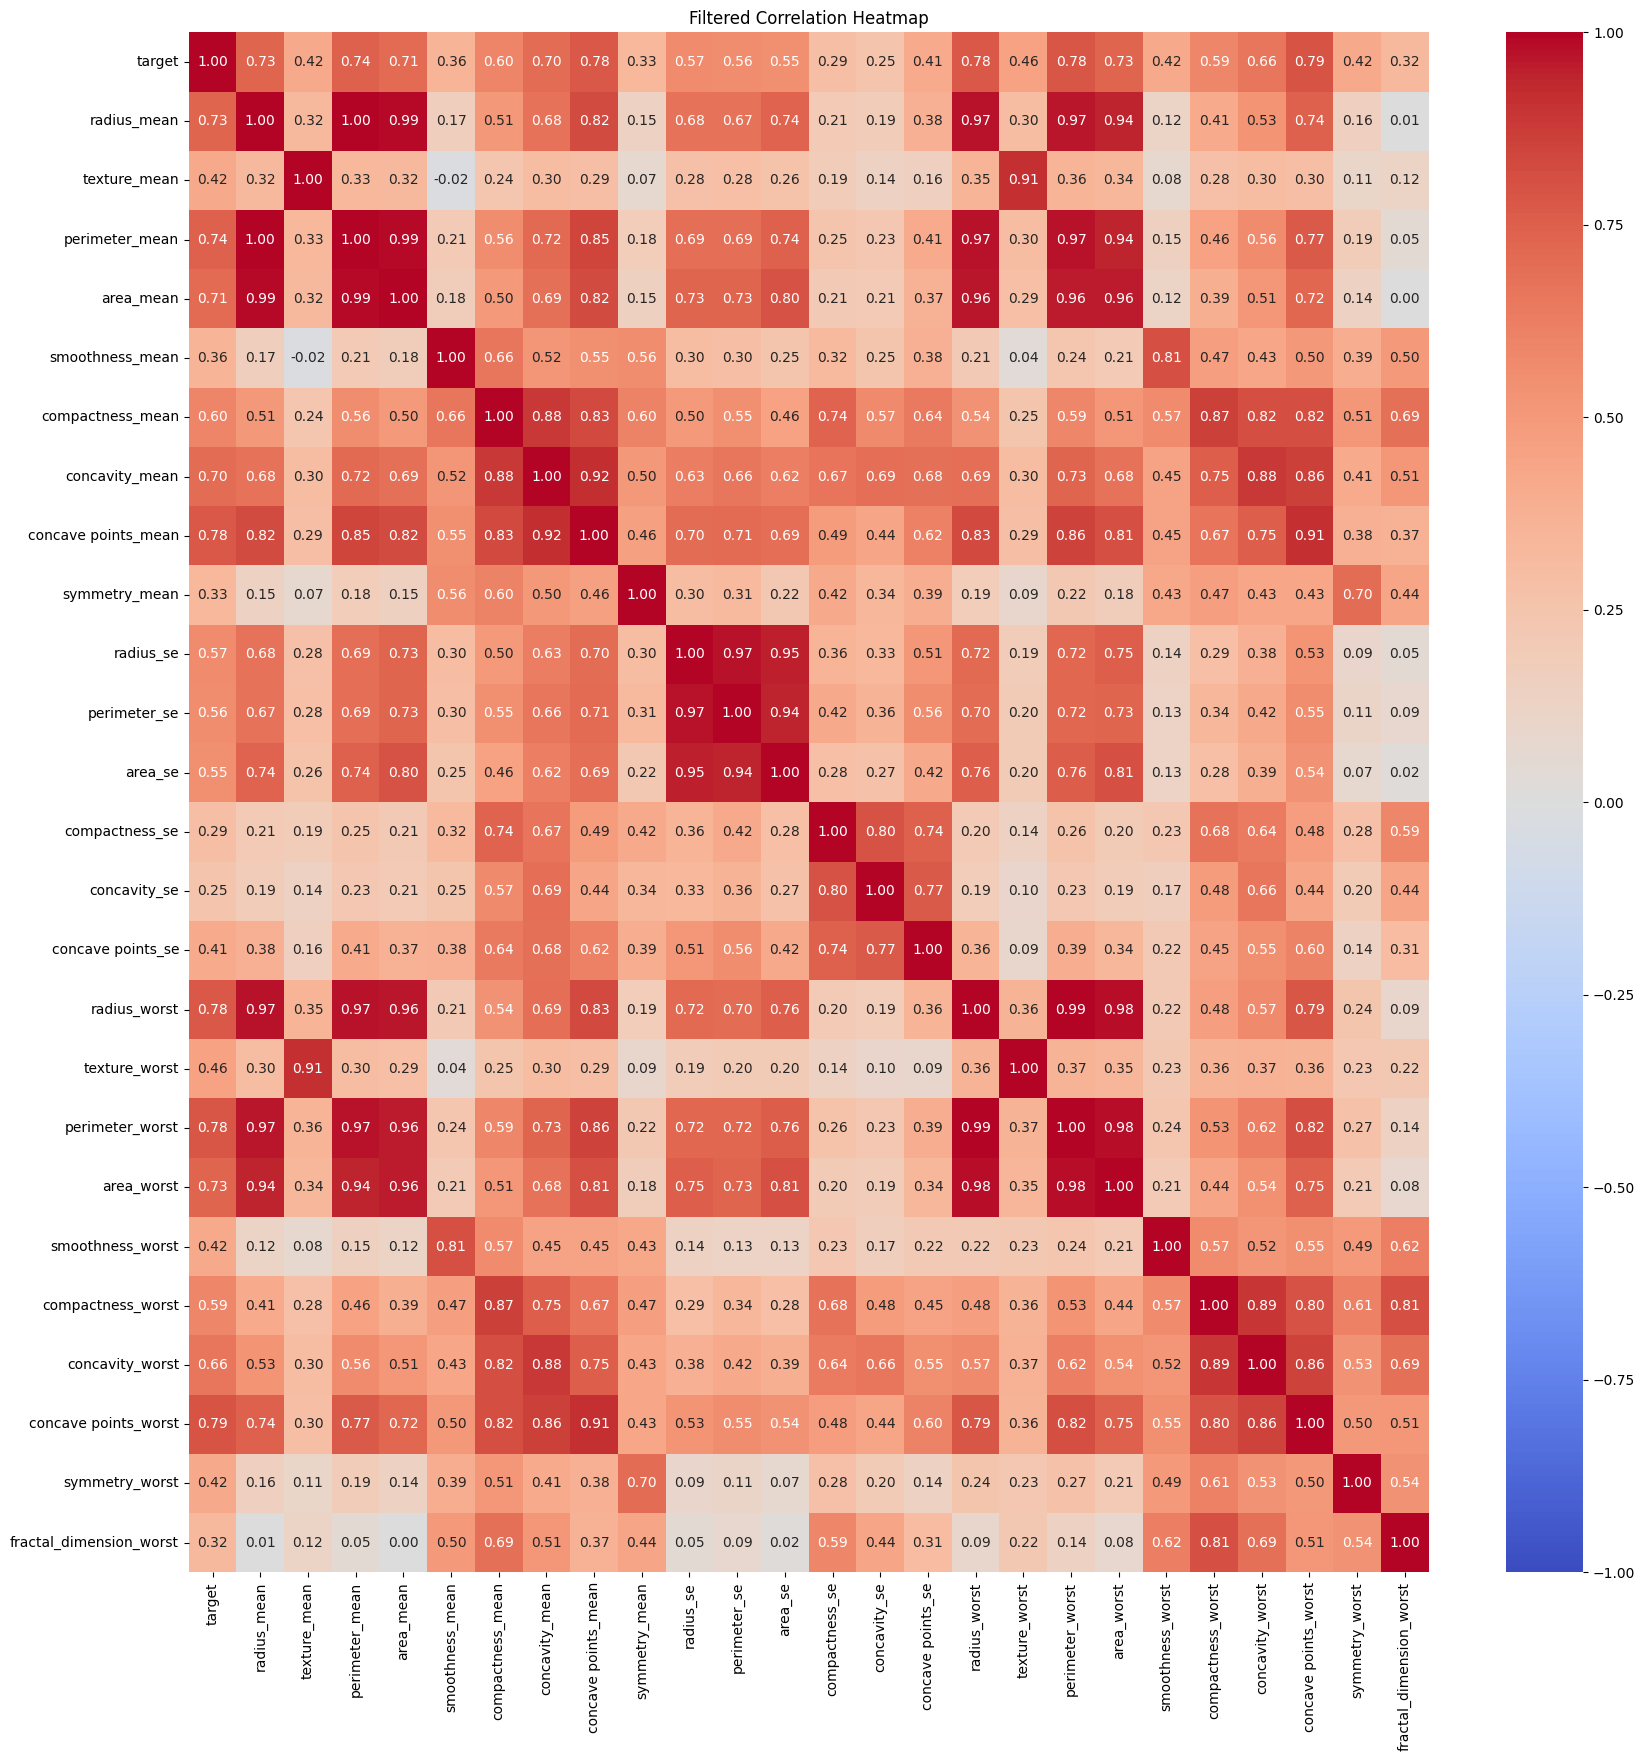

In [30]:
corr_matrix = df.corr()

corr_target = corr_matrix['target']
# keep only rows with strong correlation
strong_corr = corr_target[corr_target.abs() > 0.25].index
# filter the dataframe
df_corr = df[strong_corr]

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(
    df_corr.corr(), 
    annot=True, 
    fmt=".2f",
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1
)
plt.title("Filtered Correlation Heatmap")
plt.show()

### Train Preparations

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Split Data

In [32]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


## Standardize Data

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Grid Search

In [34]:
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'criterion': ['gini', 'entropy']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20]
    }
}

models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier()
}

In [35]:
best_params = {}
best_models = {}
accuracies = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_params[name] = grid_search.best_params_
    best_models[name] = grid_search.best_estimator_
    
    # Train model with best parameters
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Print best parameters and accuracy for each model
for model, params in best_params.items():
    print(f'Best parameters for {model}: {params}')
    print(f'Accuracy of {model}: {accuracies[model]:.4f}')
    print('-' * 50)

Best parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Accuracy of LogisticRegression: 0.9912
--------------------------------------------------
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy of KNN: 0.9474
--------------------------------------------------
Best parameters for RandomForest: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}
Accuracy of RandomForest: 0.9649
--------------------------------------------------
Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy of SVM: 0.9825
--------------------------------------------------
Best parameters for DecisionTree: {'criterion': 'entropy', 'max_depth': 10}
Accuracy of DecisionTree: 0.9474
--------------------------------------------------


### The best model is Logistic Regression with params ``{'C': 0.1, 'solver': 'liblinear'}``

## Save the best model

In [36]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_models["LogisticRegression"], file)